# P3 - CONCEVEZ UNE APPLICATION AU SERVICE DE LA SANTE PUBLIQUE
# NETTOYAGE - IMPUTATION DONNEES

## Idée : une application permettant d'avoir un score de nutrition accompagné d'un score sur l'apport en addétifs dans des produits transformés 
## Le but est de permettre au consommateur d'avoir un nutriscore et un healthyscore (liste des produits chimiquement sains) 

## La mission de nettoyage consiste à partir d'une idée d'application de:
## -filtrer les données nécessaires
## -traiter les outliers et données manques

### Chargement des bibliothèques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msn
import seaborn as sns
%matplotlib inline 

## importer data 

In [3]:
data=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t')

C:\Users\mehan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.shape

(320772, 162)

In [5]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [7]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

# visualisation data NaN

<AxesSubplot:>

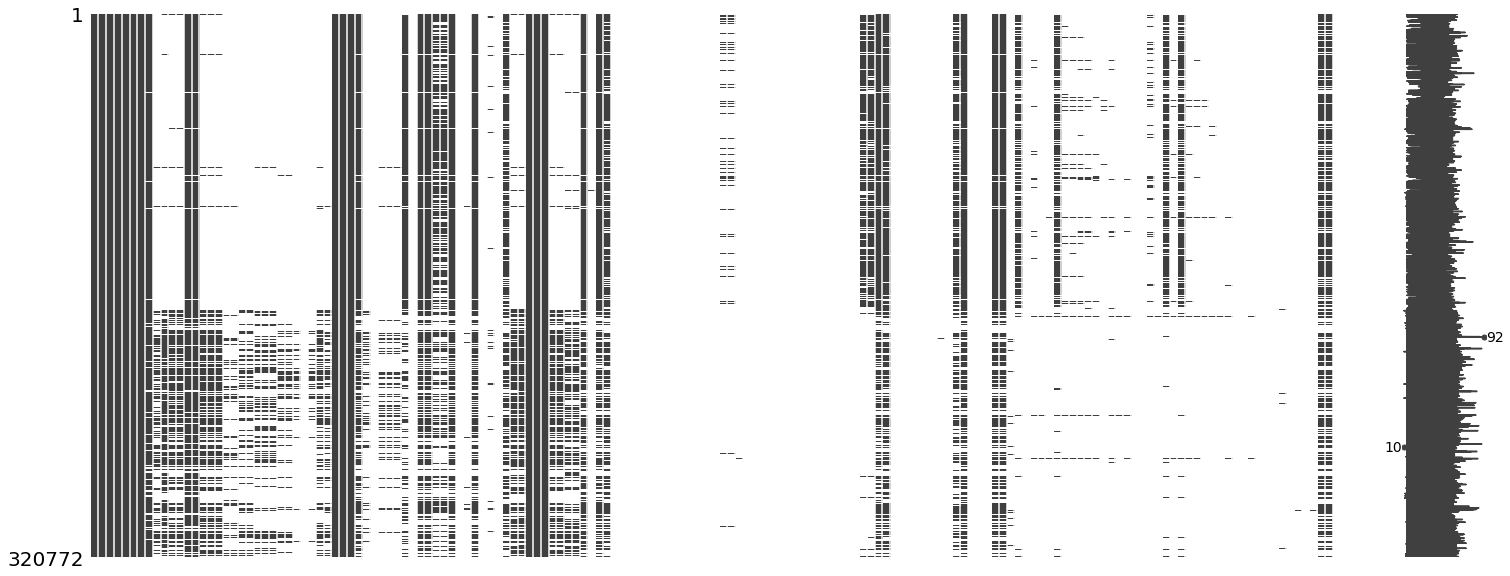

In [8]:
msn.matrix(data)

<AxesSubplot:>

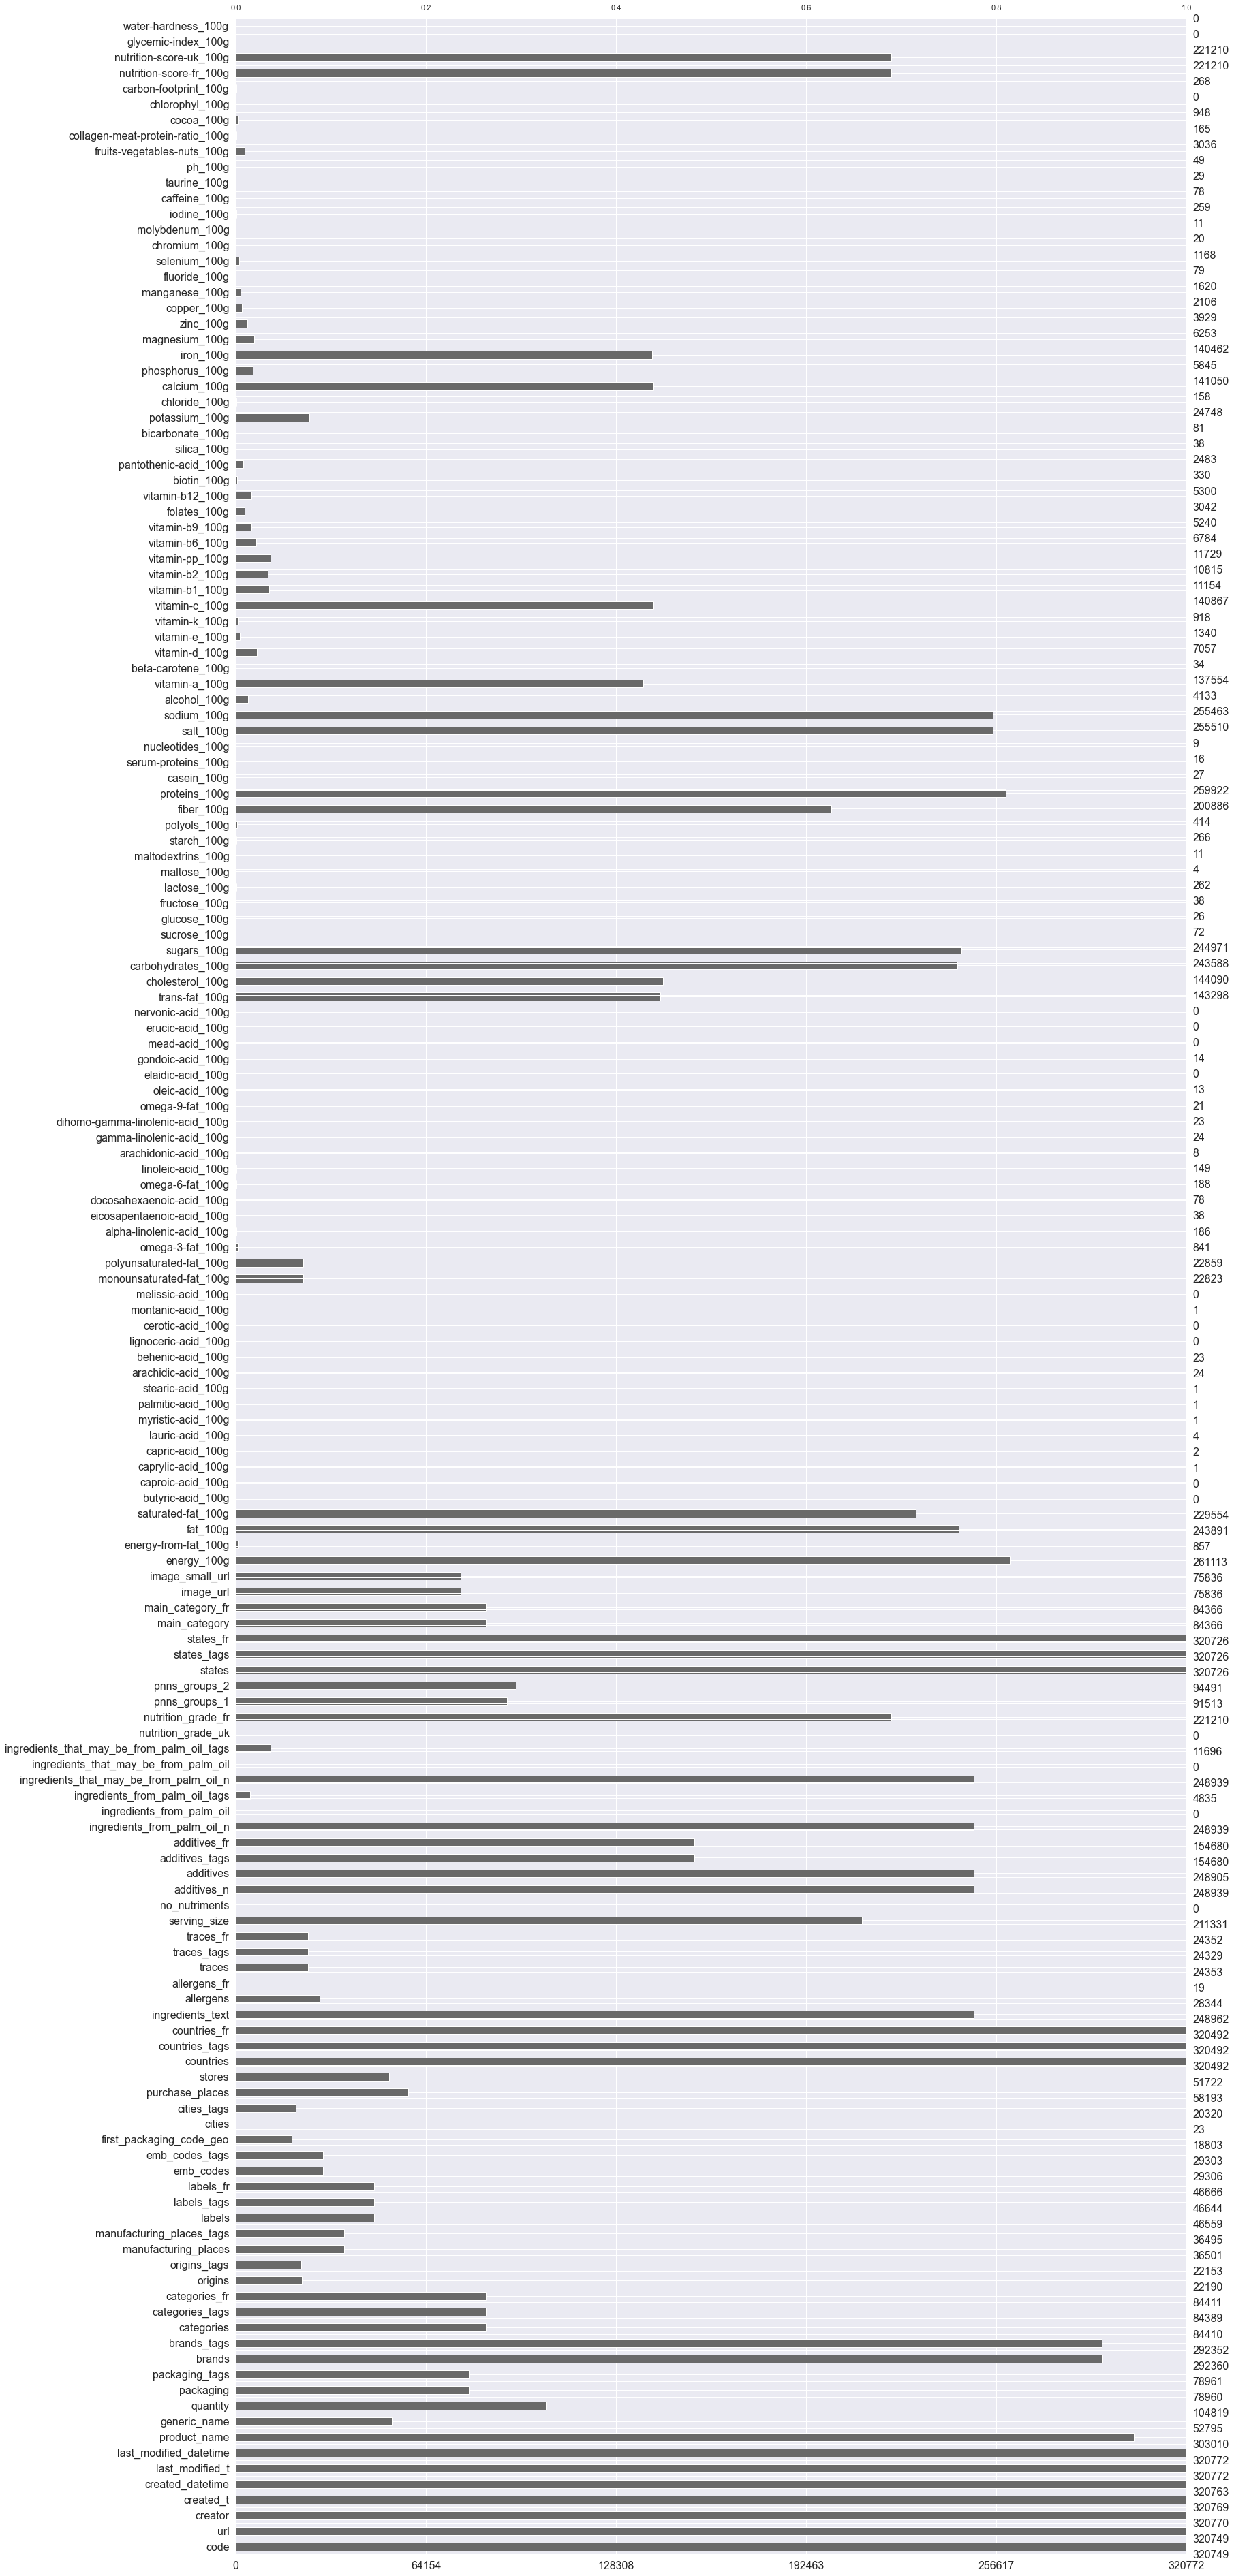

In [67]:
msn.bar(data)

In [94]:
nan=data.isnull().mean()*100

In [95]:
nan.head(50)

code                                         0.007170
url                                          0.007170
creator                                      0.000623
created_t                                    0.000935
created_datetime                             0.002806
last_modified_t                              0.000000
last_modified_datetime                       0.000000
product_name                                 5.537266
generic_name                                83.541269
quantity                                    67.322896
packaging                                   75.384385
packaging_tags                              75.384073
brands                                       8.857382
brands_tags                                  8.859876
categories                                  73.685359
categories_tags                             73.691906
categories_fr                               73.685047
origins                                     93.082314
origins_tags                

In [96]:
data.isnull().sum().sum()

39608589

In [97]:
39608589/(320772*162)

0.7622157263195134

(70.0, 80.0)

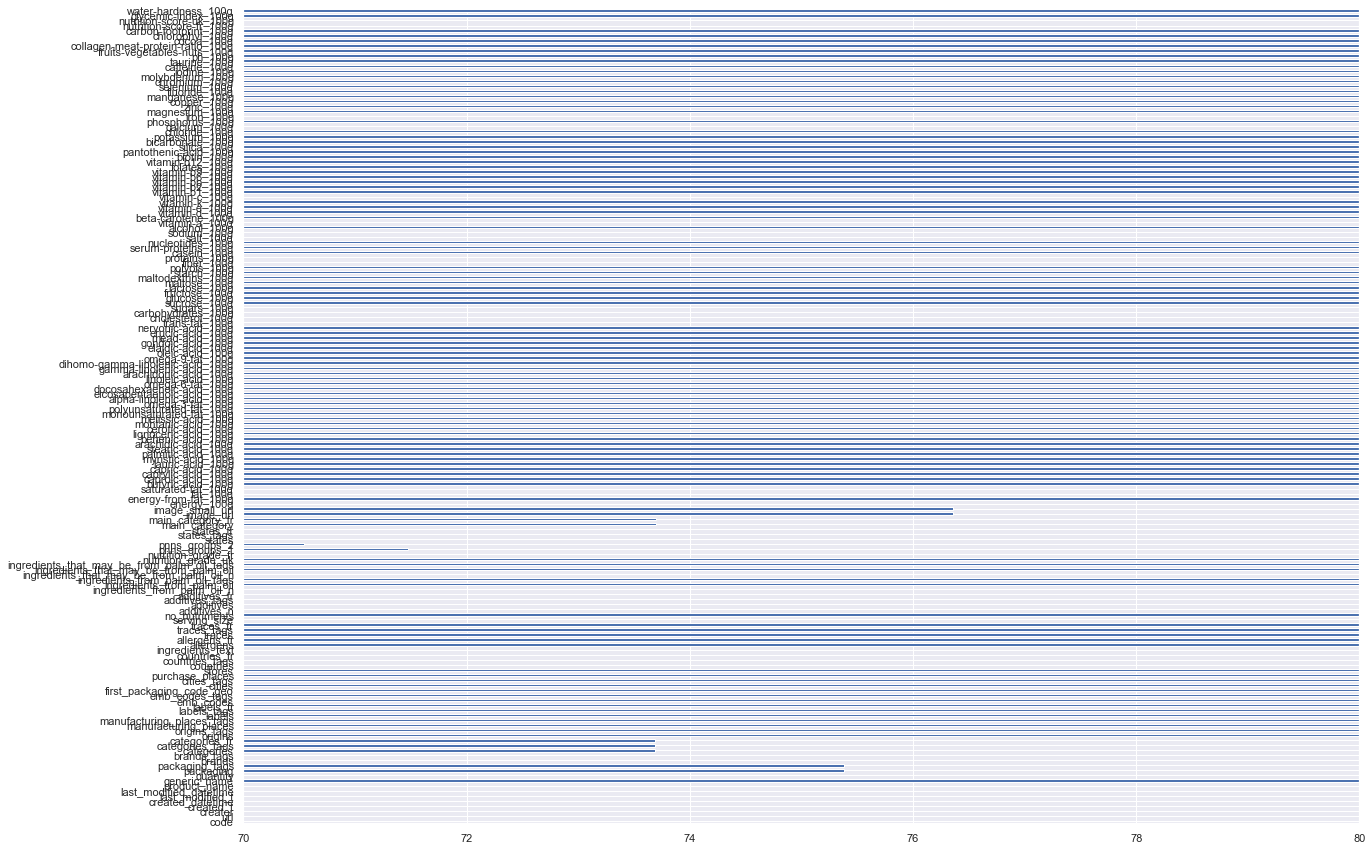

In [98]:
plt.figure(figsize=(20, 15))
nan.plot(kind='barh').set_xlim(70,80)

## Seuil de suppression des données manquantes à 60 % 

In [14]:
nandf=pd.DataFrame(nan)

In [15]:
nandf.head()

,0
code,0.007170
url,0.007170
creator,0.000623
created_t,0.000935
created_datetime,0.002806


In [16]:
nandf.set_axis(['NaN'], axis='columns', inplace=True)

In [17]:
nandf.head(5)

,NaN
code,0.007170
url,0.007170
creator,0.000623
created_t,0.000935
created_datetime,0.002806


In [18]:
nandf_mask=nandf['NaN']<40
filtered_df = nandf[nandf_mask]
variables_reduites=pd.DataFrame(nandf[nandf_mask])



In [19]:
variables_reduites.head(50)

,NaN
code,0.007170
url,0.007170
creator,0.000623
created_t,0.000935
created_datetime,0.002806
last_modified_t,0.000000
last_modified_datetime,0.000000
product_name,5.537266
brands,8.857382
brands_tags,8.859876


# creation de la nouvelle base en fonction des variables reduites

In [20]:
liste=variables_reduites.index

In [21]:
df=data.loc[:,liste]

In [22]:
df.shape

(320772, 34)

In [23]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


### elimination des variables inutiles-doubles

In [24]:
df.drop(['url','creator','created_t','created_datetime','last_modified_t','ingredients_text',
         'last_modified_datetime','nutrition-score-uk_100g','brands_tags','countries_tags','countries','serving_size',
            'ingredients_that_may_be_from_palm_oil_n','states','states_fr','states_tags'],axis=1,inplace=True)

In [25]:
#visualisation nan de df

<AxesSubplot:>

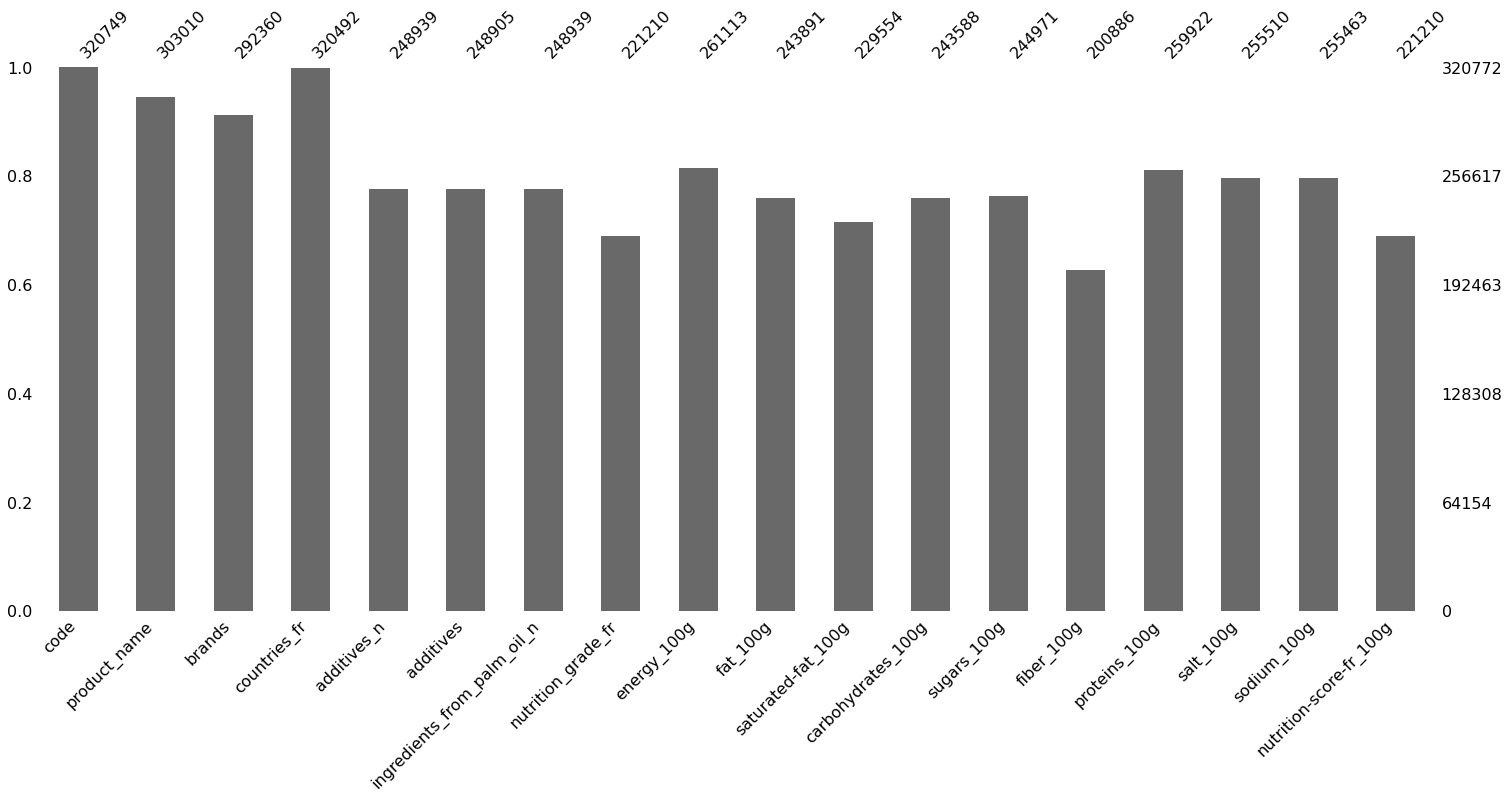

In [26]:
msn.bar(df)

###  doublons?

In [33]:
doublons_code = df[df.duplicated(['code'], keep=False)]

In [34]:
doublons_code

,code,product_name,brands,countries_fr,additives_n,additives,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
6,16117,Organic Long Grain White Rice,Lundberg,États-Unis,0.0,[ organic-long-grain-white-rice -> en:organic...,0.0,NaN,1490.0,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN
46,24600,Filet de bœuf,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,31233,35% Fruit And Fiber Muesli,Golden Temple,États-Unis,3.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,0.0,NaN,1523.0,4.55,NaN,70.91,23.64,9.1,10.91,0.18542,0.073,NaN
155,58001,Organic Salted Pistachios,Unfi,États-Unis,0.0,[ organic-pistachios -> en:organic-pistachios...,0.0,d,2540.0,46.43,5.36,32.14,10.71,10.7,21.43,1.45034,0.571,15.0
194,20004552,Côte du Rhône village,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280571,54491472,Coca-Cola,Coca-Cola,"Belgique,France,Serbie,Suisse",2.0,[ eau-petillante -> fr:eau-petillante ] [ e...,0.0,e,180.0,0.00,0.00,10.60,10.60,0.0,0.00,0.00000,0.000,14.0
280572,54491496,Diet coke,"Coca Cola,Coke,Diet Coke","France,Royaume-Uni",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281938,58449410003,Natures Path organic frosted berry toaster pas...,NaN,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300376,78742087108,Juice Cocktail Blended With Another Juice From...,Great Value,États-Unis,3.0,[ filtered-water -> en:filtered-water ] [ w...,0.0,NaN,192.0,0.00,NaN,11.67,11.67,NaN,0.00,0.05334,0.021,NaN


In [35]:
df.shape

(320772, 18)

In [36]:
df.dtypes

code                            object
product_name                    object
brands                          object
countries_fr                    object
additives_n                    float64
additives                       object
ingredients_from_palm_oil_n    float64
nutrition_grade_fr              object
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
carbohydrates_100g             float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
sodium_100g                    float64
nutrition-score-fr_100g        float64
dtype: object

In [37]:
# Creation fonction graphique des NaN

In [38]:
def filling_rate(dataframe):
    """Calcule et affiche le taux de remplissage du jeu de données"""
    
    sns.set()
    nb_rows, nb_columns = dataframe.shape
    print("Le jeu de données a {} lignes et {} colonnes.".format(nb_rows,nb_columns))

    # Calculer le nombre de non-Nan dans le Dataframe
    nb_data = dataframe.count().sum()

    # Calcul du taux de remplissage du jeu de données
    filling_rate = nb_data / (nb_rows * nb_columns)
    print("Le taux de remplissage global du jeu est de : {:.2%}".format(filling_rate))
      
    # Fréquences et labels pour le pie plot
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Données présentes", "Données manquantes"]
    fig, ax = plt.subplots(figsize=(5, 5))

    plt.title("Taux de remplissage du jeu de données", fontsize=15)
    ax.axis("equal")
    explode = (0.1, 0)  
    ax.pie(frequencies,explode=explode,autopct='%1.2f%%',shadow=True,)
    plt.legend(labels)
  

Le jeu de données a 320772 lignes et 18 colonnes.
Le taux de remplissage global du jeu est de : 80.03%


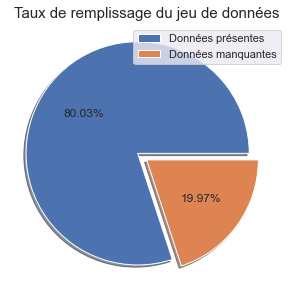

In [39]:
filling_rate(df)

In [40]:
pourcentage_nan=df.isnull().mean()*100

In [41]:
pourcentage_nan.sort_values(ascending=False)

fiber_100g                     37.374210
nutrition-score-fr_100g        31.038245
nutrition_grade_fr             31.038245
saturated-fat_100g             28.437021
carbohydrates_100g             24.061951
fat_100g                       23.967491
sugars_100g                    23.630803
additives                      22.404387
ingredients_from_palm_oil_n    22.393787
additives_n                    22.393787
sodium_100g                    20.359944
salt_100g                      20.345292
proteins_100g                  18.969860
energy_100g                    18.598568
brands                          8.857382
product_name                    5.537266
countries_fr                    0.087289
code                            0.007170
dtype: float64

### Variables retenues pour l'application 

In [42]:
#Variables retenues :

# code : identifiant unique du produit
# product_name : nom du produit pour effectuer la recherche de notre application.
# countries_fr : liste des pays où le produit est vendu (on retiendra vendus en France).
# brands : pour retrouver le produit
# nutriments:outes les variables terminant par '_100g'
# energy_100g : donnée en KJ
# additives_n : nombre d'additifs alimentaires
# additives : liste des additifs alimentaires
# nutriscore
# nutrigrade


In [43]:
infos=['code','product_name','brands']

nutriments= ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g',
             'fiber_100g','proteins_100g','salt_100g', 'sodium_100g']



In [44]:
energy=['energy_100g']

In [99]:
add=['additives_n','additives']

In [100]:
nutri_scor=['nutrition-score-fr_100g','nutrition_grade_fr']

In [101]:
variables_retenues= infos+nutriments + energy +add+ nutri_scor
variables_retenues

['code',
 'product_name',
 'brands',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'energy_100g',
 'additives_n',
 'additives',
 'nutrition-score-fr_100g',
 'nutrition_grade_fr']

In [102]:
BD=df[variables_retenues].reset_index(drop=True)
BD.head(3)

,code,product_name,brands,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,additives,nutrition-score-fr_100g,nutrition_grade_fr
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.00,2243.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,14.0,d
2,4559,Peanuts,Torn & Glasser,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.25,1941.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,b


<AxesSubplot:>

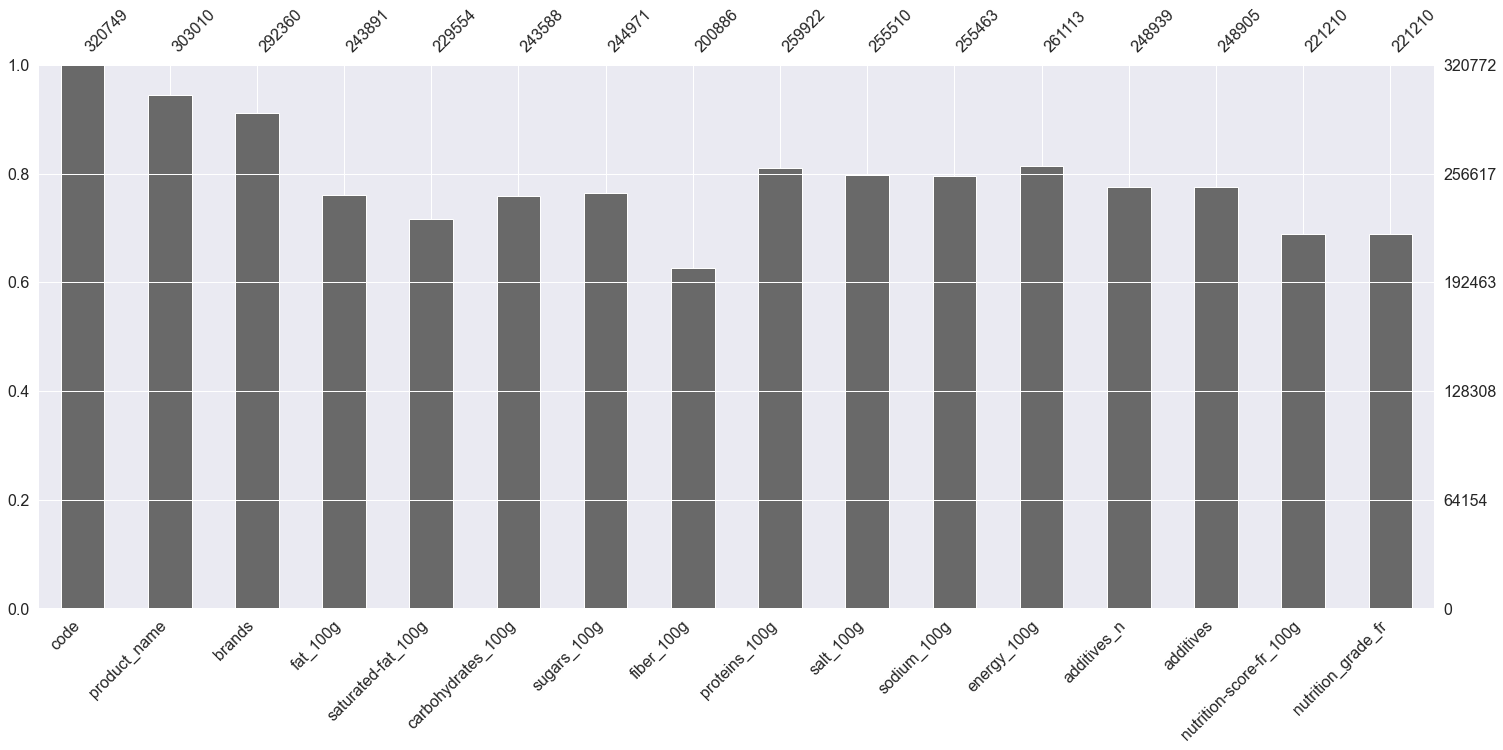

In [103]:
msn.bar(BD)

In [104]:
#supprimer les produits sans nom --> impossible de les réferencer pour l'application

In [105]:
BD.dropna(subset=['product_name'],inplace=True)

In [106]:
BD.shape

(303010, 16)

<AxesSubplot:>

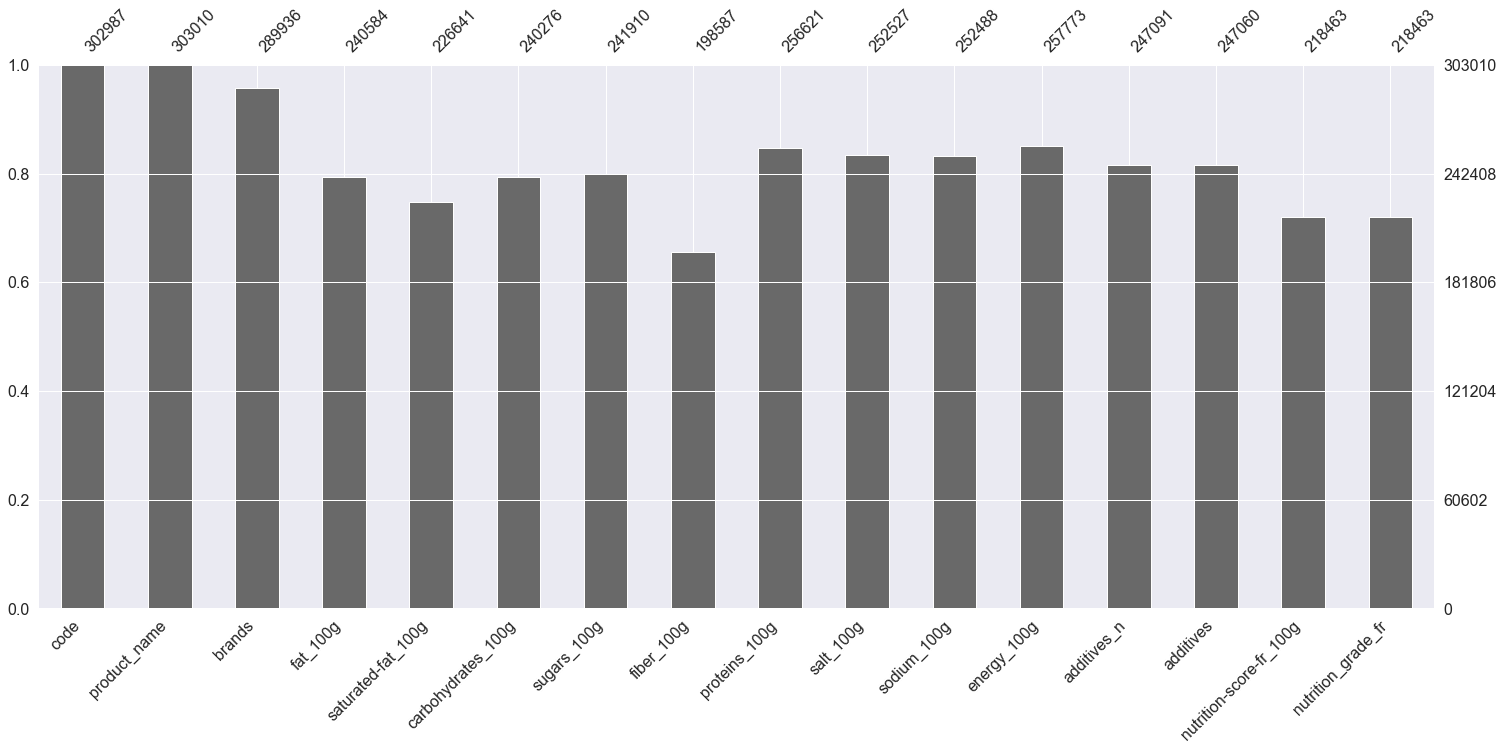

In [107]:
msn.bar(BD)

Le jeu de données a 303010 lignes et 16 colonnes.
Le taux de remplissage global du jeu est de : 82.39%


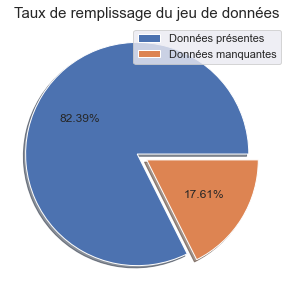

In [108]:
filling_rate(BD)

# Traitement des outliers

In [49]:
# on garde uniquement les indicateurs nutritionnels comprises entre 0 et 100 g

In [50]:
BD = BD.query("~(fat_100g < 0) and ~(fat_100g > 100)")
BD = BD.query("~(carbohydrates_100g < 0) and ~(carbohydrates_100g  > 100)")
BD = BD.query("~(sugars_100g < 0) and ~(sugars_100g  > 100)")
BD = BD.query("~(fiber_100g < 0) and ~(fiber_100g  > 100)")
BD = BD.query("~(salt_100g < 0) and ~(salt_100g  > 100)")
BD = BD.query("~(sodium_100g < 0) and ~(sodium_100g  > 100)")

# Supprimer les lignes avec une somme supérieure à 100 g 

In [52]:
BD['sum']=BD['fat_100g']+BD['carbohydrates_100g']+BD['fiber_100g']+BD['proteins_100g']+BD['salt_100g']

In [53]:
BD=BD.loc[BD['sum']<=100]

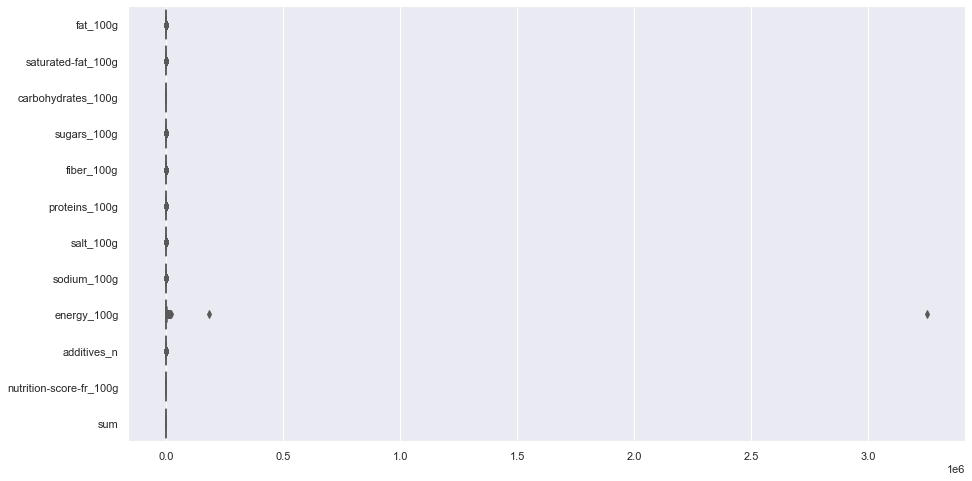

In [54]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(data=BD,orient="h", palette="Set2")

In [55]:
# Le maximum de calories pour un produit de 100g est 900 kcal
# 1 calorie=4,184 Joules donc 900 kcal = 3765 kJoules=max

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


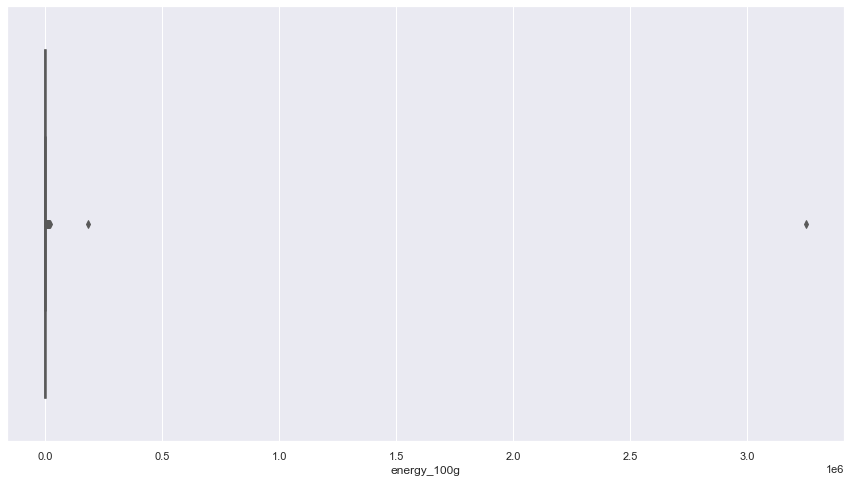

In [56]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(BD['energy_100g'],orient="h", palette="Set2")


In [57]:
BD['energy_100g'] = [np.nan if val > 3765 else val for val in BD['energy_100g']]

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


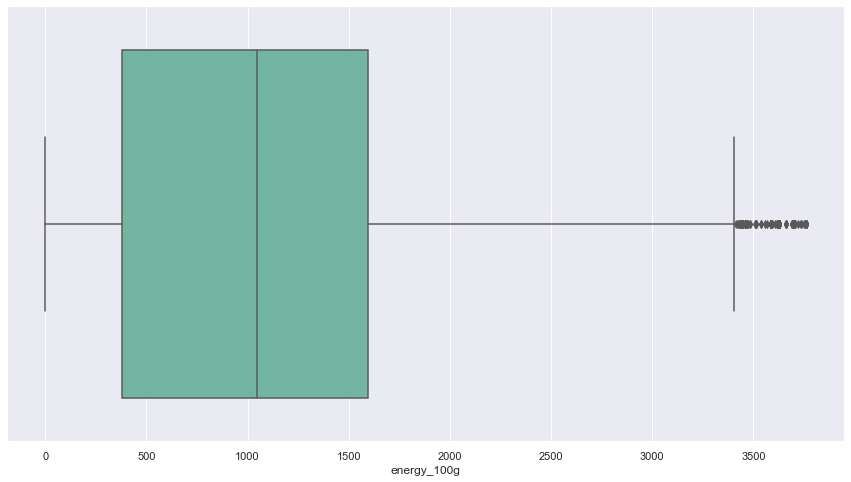

In [58]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(BD['energy_100g'],orient="h", palette="Set2")

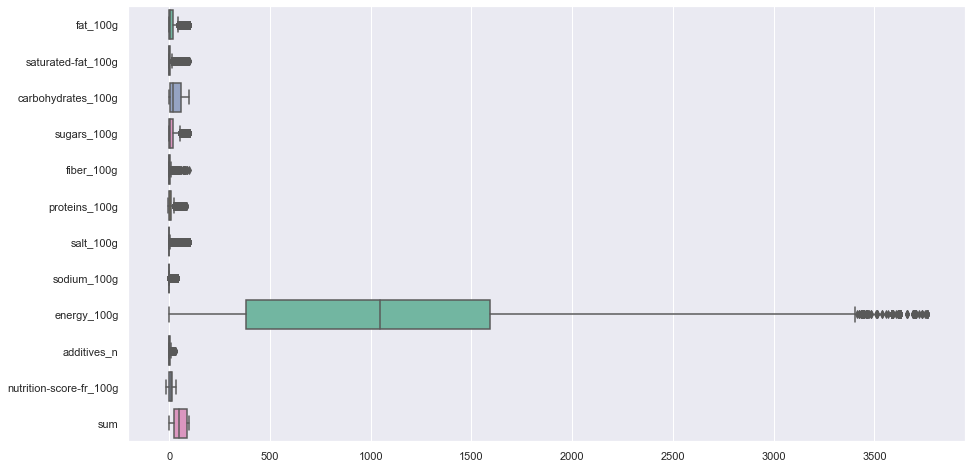

In [59]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(data=BD,orient="h", palette="Set2")

# Traitement des NaN

<AxesSubplot:>

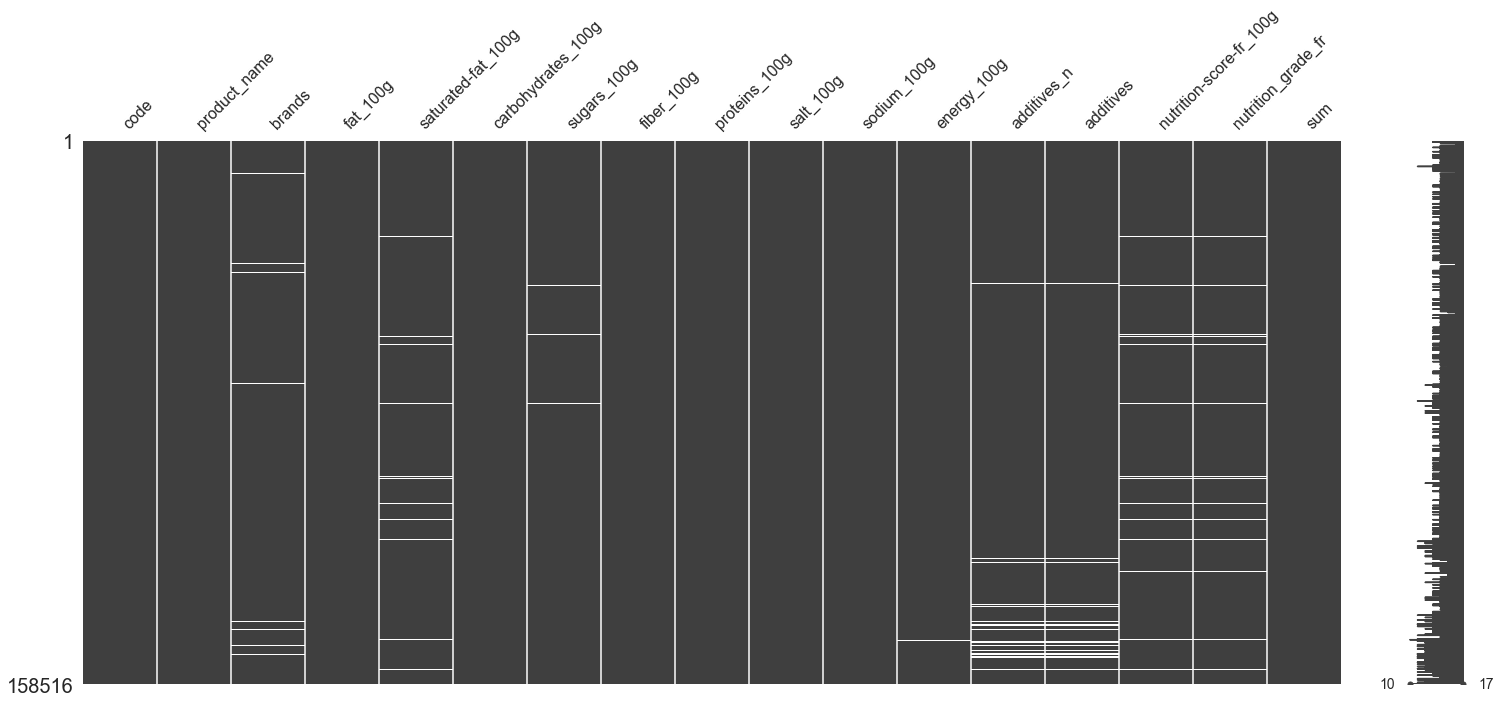

In [60]:
msn.matrix(BD)

In [61]:
BD.shape

(158516, 17)

In [62]:
BD.isnull().mean()*100

code                       0.000000
product_name               0.000000
brands                     1.254132
fat_100g                   0.000000
saturated-fat_100g         2.175175
carbohydrates_100g         0.000000
sugars_100g                0.726110
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
sodium_100g                0.011355
energy_100g                0.187363
additives_n                3.060259
additives                  3.069722
nutrition-score-fr_100g    2.923364
nutrition_grade_fr         2.923364
sum                        0.000000
dtype: float64

In [63]:
BD.columns

Index(['code', 'product_name', 'brands', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'energy_100g', 'additives_n', 'additives',
       'nutrition-score-fr_100g', 'nutrition_grade_fr', 'sum'],
      dtype='object')

In [64]:
BD['nutrition_grade_fr'].unique()

array(['d', 'a', 'c', nan, 'b', 'e'], dtype=object)

In [65]:
BD['nutrition_grade_fr']=BD['nutrition_grade_fr'].str.upper().apply(str)

In [66]:
BD['nutrition_grade_fr'].unique()

array(['D', 'A', 'C', 'nan', 'B', 'E'], dtype=object)

### Case1: supprimer les NaN 

In [67]:
BD1=BD.copy()

In [68]:
BD1 = BD1.dropna(axis=0)

In [69]:
BD1.shape

(147656, 17)

<AxesSubplot:>

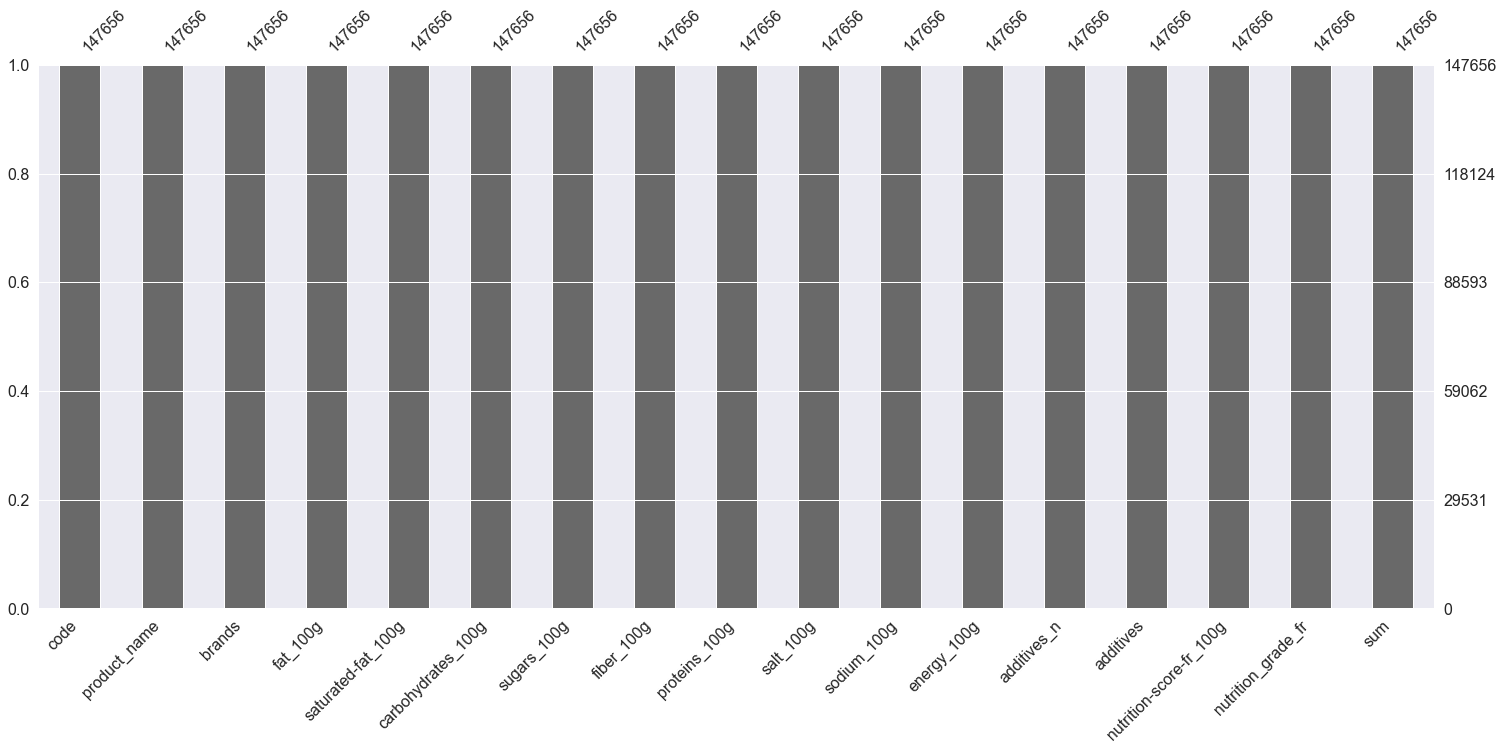

In [70]:
msn.bar(BD1)

In [71]:
BD1.shape

(147656, 17)

In [72]:
1-(147656*17)/(158516*17)

0.0685104342779278

### perte de 6.85% des données 

### Case 2 imputer des valeurs aux NaN avec SimpleImputer

In [73]:
var=[ 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'energy_100g', 'additives_n',
       'nutrition-score-fr_100g']

In [74]:
BD2=BD[var]

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
BD2.iloc[:,:]=imputer.fit_transform(BD2)

C:\Users\mehan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mehan\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [77]:
BD2.head()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
12,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,2230.0,1.0,12.0
19,5.95,1.19,66.67,2.38,9.5,16.67,0.02540,0.010,1096.0,0.0,-6.0
20,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,0.112,1464.0,0.0,14.0
23,50.00,3.33,23.33,6.67,10.0,6.67,1.27000,0.500,2372.0,2.0,11.0
24,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,0.078,1954.0,3.0,9.0


<AxesSubplot:>

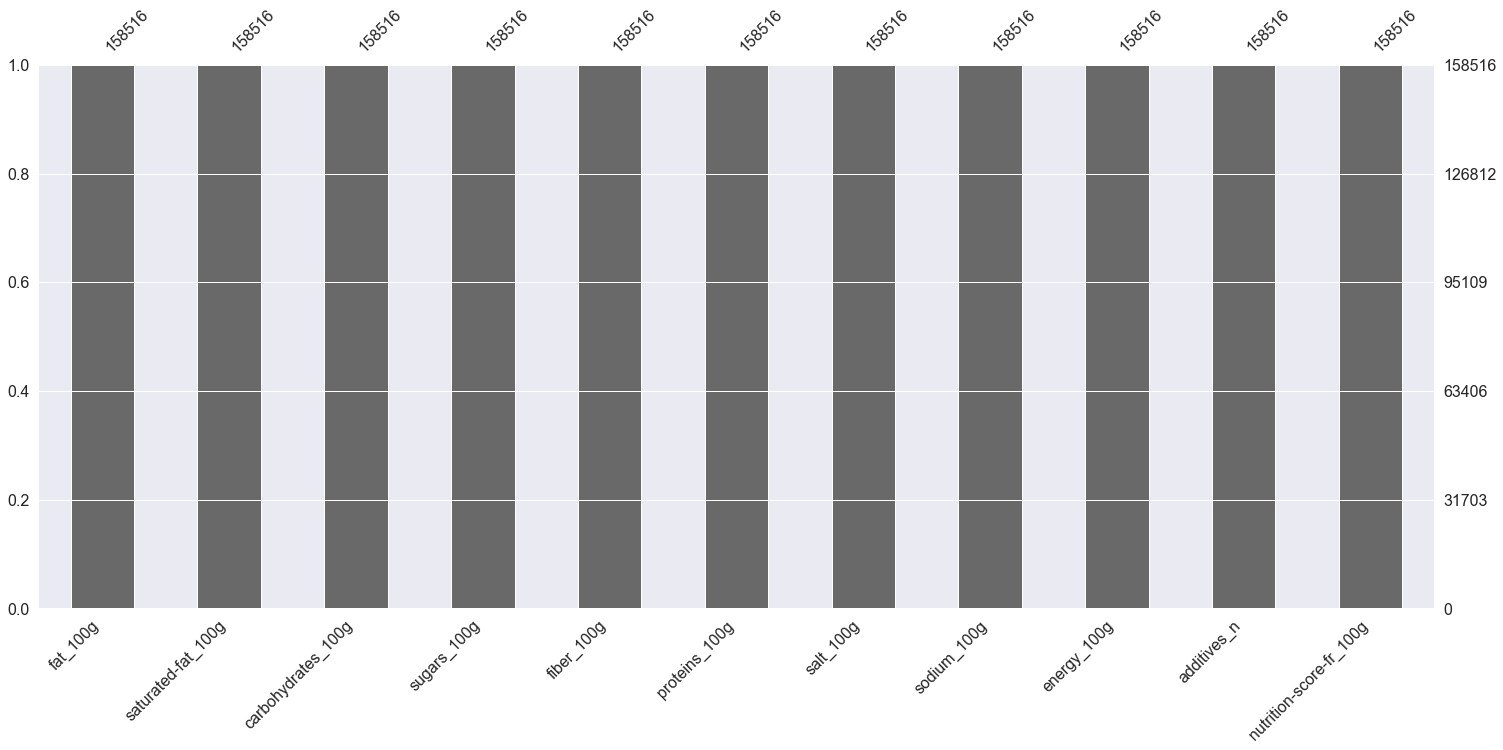

In [78]:
msn.bar(BD2)

In [79]:
BD2.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
count,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000
mean,10.824128,4.195388,31.683681,14.287132,2.114608,7.050089,1.254551,0.493973,1054.624606,2.053428,8.260362
std,14.145343,6.532020,27.879128,18.995559,3.097899,7.633006,4.119425,1.621806,703.794772,2.530736,8.929687
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.380000,0.000000,6.670000,1.400000,0.000000,1.500000,0.101600,0.040000,381.000000,0.000000,1.000000
50%,4.900000,1.330000,21.000000,5.000000,1.200000,4.800000,0.650240,0.256000,1046.000000,1.000000,8.260362
75%,17.240000,6.000000,57.000000,21.242500,3.200000,10.000000,1.358900,0.535000,1594.000000,3.000000,15.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,100.000000,39.370079,3761.000000,31.000000,36.000000


### Case 3 imputation KNNimputer 

In [115]:
BD3=BD.copy()

In [116]:
var=[ 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'energy_100g', 'additives_n',
       'nutrition-score-fr_100g']

In [117]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=50)
df_filled = imputer.fit_transform(BD3[var])

In [118]:
BD3filled=pd.DataFrame(df_filled)

In [119]:
BD3filled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,12.701388,5.115709,32.091647,15.993129,2.863581,7.073898,2.037957,0.802467,1140.497182,1.937748,9.151724
1,28.570000,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,2243.000000,0.000000,14.000000
2,17.860000,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,1941.000000,0.000000,0.000000
3,57.140000,5.360000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,2540.000000,0.000000,12.000000
4,1.430000,0.286200,77.140000,35.345600,5.700000,8.570000,4.910433,1.933267,1552.000000,0.000000,-0.540000


<AxesSubplot:>

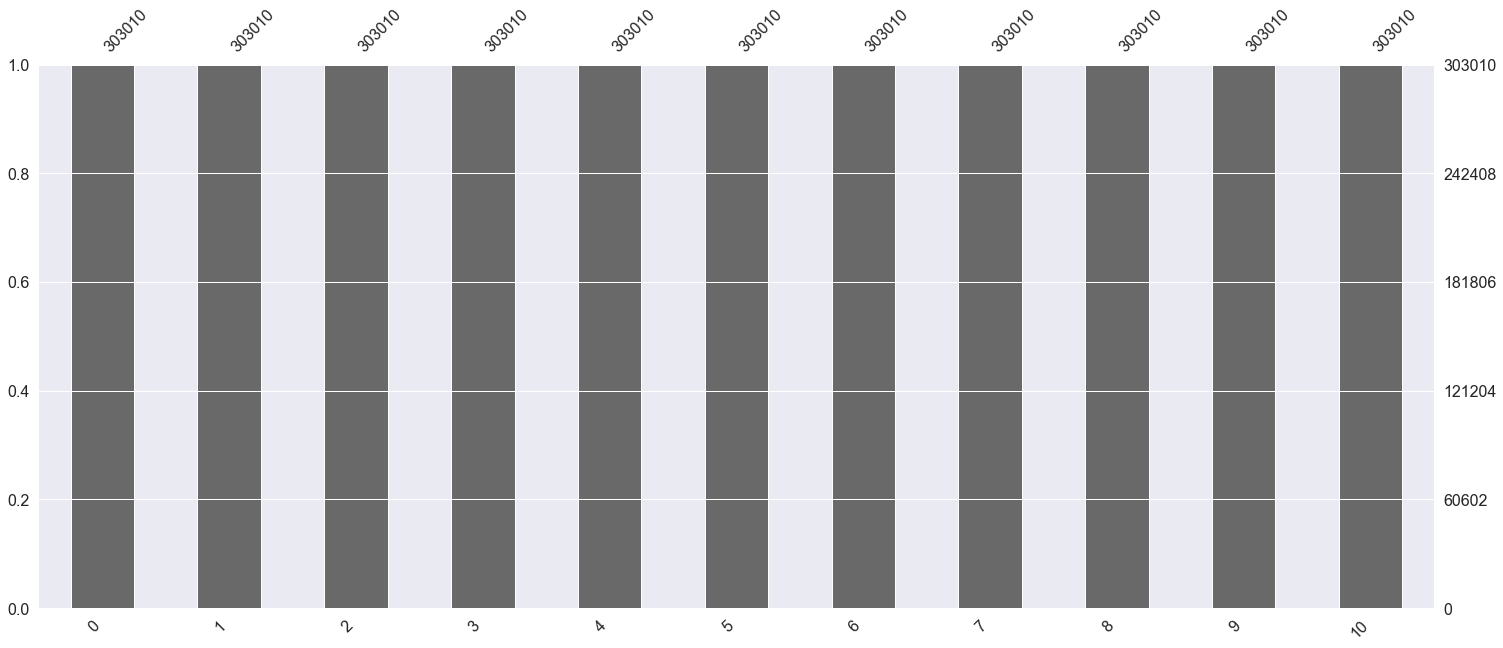

In [120]:
msn.bar(BD3filled)

In [121]:
BD3filled.set_axis(['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'energy_100g', 'additives_n', 'nutrition-score-fr_100g'], axis = 1,inplace=True)

In [122]:
np.round(BD3filled.describe(), 2)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
count,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00,303010.00
mean,12.38,4.65,31.74,16.77,2.61,7.03,2.09,0.81,1140.77,1.88,8.22
std,15.89,7.11,26.78,20.59,10.53,7.76,117.79,46.37,6004.57,2.28,8.15
min,0.00,0.00,0.00,-17.86,-6.70,-800.00,0.00,0.00,0.00,0.00,-15.00
25%,0.50,0.01,8.57,2.17,0.03,1.22,0.10,0.04,464.00,0.00,1.00
50%,8.06,2.46,29.23,10.60,1.80,6.14,0.85,0.30,1140.50,1.26,9.00
75%,17.22,5.36,50.80,21.43,3.30,8.80,1.90,0.75,1594.00,2.00,14.00
max,714.29,550.00,2916.67,3520.00,5380.00,430.00,64312.80,25320.00,3251373.00,31.00,40.00


In [123]:
# rajouter la variable 'product_name'

In [163]:
df=BD3['product_name']

In [164]:
df=pd.DataFrame(BD3.loc[:,'product_name'])

In [165]:
df= df.rename_axis('index').reset_index()

In [166]:
BDF = BD3filled.merge(df, how='outer',left_index=True, right_index=True)


In [167]:
BDF.drop(columns=["index"],inplace=True)

In [168]:
BDF.head(2)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g,product_name
0,12.701388,5.115709,32.091647,15.993129,2.863581,7.073898,2.037957,0.802467,1140.497182,1.937748,9.151724,Farine de blé noir
1,28.570000,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,2243.000000,0.000000,14.000000,Banana Chips Sweetened (Whole)


In [103]:
# rajouter la variable 'additives'

In [169]:
df=BD3['additives']

In [170]:
df.shape

(303010,)

In [171]:
add=pd.DataFrame(BD3.loc[:,'additives'])

In [172]:
add.head()

,additives
0,NaN
1,[ bananas -> en:bananas ] [ vegetable-oil -...
2,[ peanuts -> en:peanuts ] [ wheat-flour -> ...
3,[ organic-hazelnuts -> en:organic-hazelnuts ...
4,[ organic-polenta -> en:organic-polenta ] [...


In [173]:
add = add.rename_axis('index').reset_index()

In [174]:
BDF = BDF.merge(add, how='outer',left_index=True, right_index=True)

In [175]:
BDF.drop(columns=["index"],inplace=True)

In [176]:
BDF.head(2)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g,product_name,additives
0,12.701388,5.115709,32.091647,15.993129,2.863581,7.073898,2.037957,0.802467,1140.497182,1.937748,9.151724,Farine de blé noir,NaN
1,28.570000,28.570000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,2243.000000,0.000000,14.000000,Banana Chips Sweetened (Whole),[ bananas -> en:bananas ] [ vegetable-oil -...


In [112]:
#rajouter la variable 'nutrition_grade_fr'

In [177]:
df=BD3['nutrition_grade_fr']

In [178]:
grade=pd.DataFrame(BD3.loc[:,'nutrition_grade_fr'])

In [179]:
grade = grade.rename_axis('index').reset_index()

In [180]:
BDF = BDF.merge(grade, how='outer',left_index=True, right_index=True)

In [181]:
BDF.drop(columns=["index"],inplace=True)

In [183]:
BDF.head(1)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g,product_name,additives,nutrition_grade_fr
0,12.701388,5.115709,32.091647,15.993129,2.863581,7.073898,2.037957,0.802467,1140.497182,1.937748,9.151724,Farine de blé noir,NaN,NaN


In [109]:
#rajouter la variable 'code'

In [184]:
df=BD3['code']

In [185]:
code=pd.DataFrame(BD3.loc[:,'code'])

In [186]:
code = code.rename_axis('index').reset_index()

In [187]:
BDF = BDF.merge(code, how='outer',left_index=True, right_index=True)

In [188]:
BDF.drop(columns=["index"],inplace=True)

In [189]:
BDF.head(1)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g,product_name,additives,nutrition_grade_fr,code
0,12.701388,5.115709,32.091647,15.993129,2.863581,7.073898,2.037957,0.802467,1140.497182,1.937748,9.151724,Farine de blé noir,NaN,NaN,3087


<AxesSubplot:>

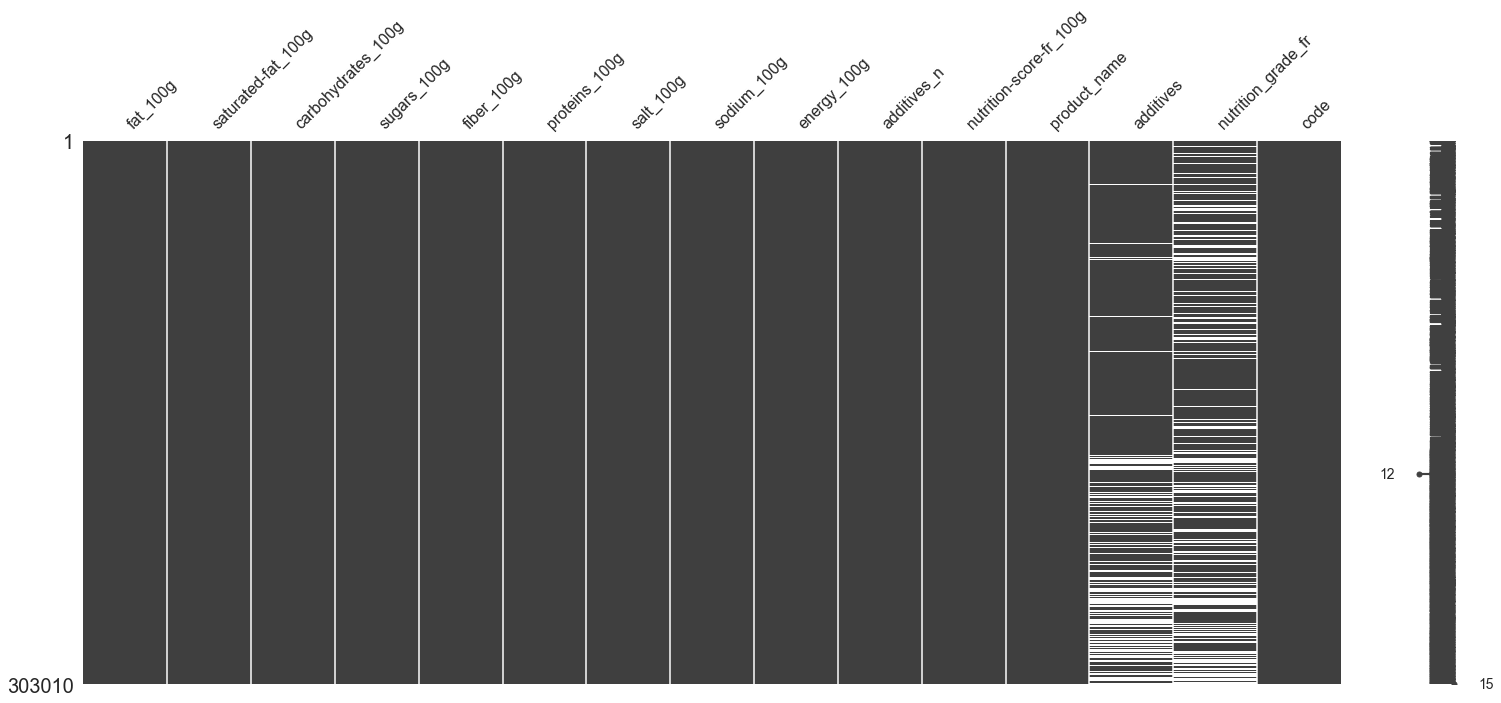

In [194]:
msn.matrix(BDF)

Le jeu de données a 303010 lignes et 15 colonnes.
Le taux de remplissage global du jeu est de : 96.91%


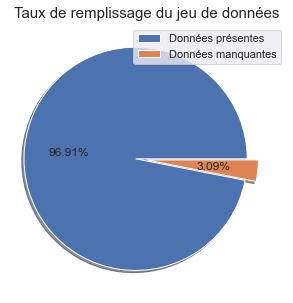

In [190]:
filling_rate(BDF)

In [191]:
BDF.shape

(303010, 15)

In [192]:
# sauvegarde BDF

In [193]:
BDF.to_csv('projet3_clean')